# Calculating Portfolio rate of return

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from pandas_datareader import data as wb
import yfinance 

In [3]:
yfinance.pdr_override()

## Importing Securities Data That You Wanted to Compare

In [24]:
tickers = ['ITMG.jk', 'BYAN.jk', 'GEMS.jk', 'BSSR.jk','MBAP.jk', 'ABMM.jk']
securities = pd.DataFrame()
for ticker in tickers :
    securities[ticker] = wb.get_data_yahoo(ticker, start = '2018-01-01', end='2023-04-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [25]:
securities.head()

,ITMG.jk,BYAN.jk,GEMS.jk,BSSR.jk,MBAP.jk,ABMM.jk
Date,,,,,,
2018-01-01,9033.497070,743.981018,1533.016724,932.805542,1564.565430,2054.015381
2018-01-02,8935.304688,750.999634,1533.016724,972.783020,1564.565430,2054.015381
2018-01-03,8717.104492,750.999634,1533.016724,972.783020,1537.590576,2054.015381
2018-01-04,8771.655273,743.981018,1533.016724,950.573364,1553.775513,2054.015381
2018-01-05,9197.147461,747.490295,1533.016724,1052.737915,1580.750610,2098.667969


In [26]:
securities.tail()

,ITMG.jk,BYAN.jk,GEMS.jk,BSSR.jk,MBAP.jk,ABMM.jk
Date,,,,,,
2023-03-27,32456.796875,19275.0,6500.0,3990.0,6250.0,2760.0
2023-03-28,33489.511719,19400.0,6500.0,4060.0,6475.0,2950.0
2023-03-29,34395.773438,19900.0,6525.0,4130.0,6725.0,3090.0
2023-03-30,33025.843750,20750.0,6500.0,4090.0,6775.0,3070.0
2023-03-31,33215.527344,20775.0,6500.0,3940.0,6325.0,3170.0


## Normalizing The Stock Starting Point (Normalizing to 100) 

$$
\frac {P_t}{P_0} * 100
$$

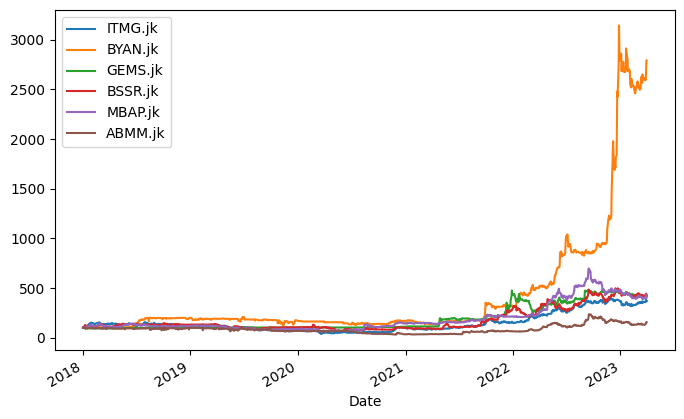

In [27]:
(securities / securities.iloc[0] * 100).plot(figsize = (8,5))
plt.show()

### What happened if you don't normalize the data

Look at the chart below, the time series will only look at the closing price of a stock, thus it's harder to draw conclusion on which stocks have the highest return

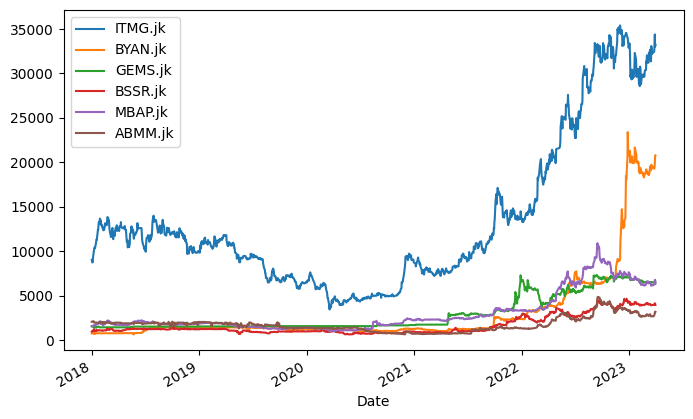

In [28]:
(securities).plot(figsize = (8,5))
plt.show()

## Calculating The Rate of Return

In [34]:
rate_of_return = (securities / securities.shift(1)) - 1
rate_of_return.head()

,ITMG.jk,BYAN.jk,GEMS.jk,BSSR.jk,MBAP.jk,ABMM.jk
Date,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,-0.010870,0.009434,0.0,0.042857,0.000000,0.000000
2018-01-03,-0.024420,0.000000,0.0,0.000000,-0.017241,0.000000
2018-01-04,0.006258,-0.009346,0.0,-0.022831,0.010526,0.000000
2018-01-05,0.048508,0.004717,0.0,0.107477,0.017361,0.021739


### Average Yearly Rate of Return 

In [36]:
annual_return =  rate_of_return.mean() * 250
annual_return

ITMG.jk    0.345691
BYAN.jk    0.761285
GEMS.jk    0.334620
BSSR.jk    0.409691
MBAP.jk    0.341291
ABMM.jk    0.286708
dtype: float64

### Return Based on Your Portfolio Weight

In [38]:
weight = [16.6, 16.6, 16.6,16.6,16.6,16.6] # assumption if you have an equal portfolio
np.dot(annual_return, weight)

41.156157305148895